In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
### Properties & Inputs ###

# You can change the values below and test different conditions.

node_number = 80        # Number of nodes
time_step = 800         # Number of time steps
T = 10                  # Total time elapsed
D = 0.005               # Diffusion coefficient (m^2/s)
u = 0.8                 # Celerity of flow (m/s)
L = 2                   # Length of the element
theta = 0.1             # Weighting factor

dt = T / time_step      # delta t
dx = L / node_number    # delta x

Cr = u*dt/dx            # Courant number
Pe = u*dx/D             # Peclet number

c matrix shape dimentions: (800, 80)


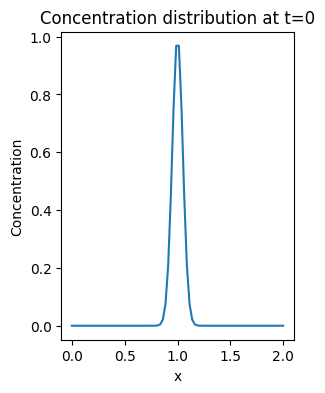

In [8]:
### Initializing the matrix that will hold the calculated concentrations
c = np.zeros((time_step, node_number))
print(f'c matrix shape dimentions: {c.shape}')

### Initial condition (t = 0)
x = np.linspace(0, L, node_number)
initial_condition = lambda x: np.exp(-((x-1)**2) / D)
c[0] = initial_condition(x)

### Ploting {x vs Concentration} at t = 0
fig1, ax1 = plt.subplots(figsize=(3,4))
ax1.plot(x, c[0])
ax1.set_xlabel('x')
ax1.set_ylabel('Concentration')
ax1.set_title('Concentration distribution at t=0')

plt.show()

In [9]:
### Using finit difference method to calculate each node's concentration
for j in range(time_step - 1):
    for i in range(node_number):
        
        # Inner nodes
        if i != 0 and i != (node_number-1):
            c[j+1][i] = (((Cr/Pe)-theta*(Cr/Pe))*c[j][i-1] + (1+(Cr/2)-2*(Cr/Pe)+theta*(Cr/Pe))*c[j][i] + ((Cr/Pe)-(Cr/2))*c[j][i+1] + ((Cr/2)+theta*(Cr/Pe))*c[j-1][i+1]) / (1+(Cr/2)+theta*(Cr/Pe))
        
        # Boundary nodes
        else:
            c[j+1][i] = 0

### Creating a dataframe to hold the results            
df = pd.DataFrame(c)

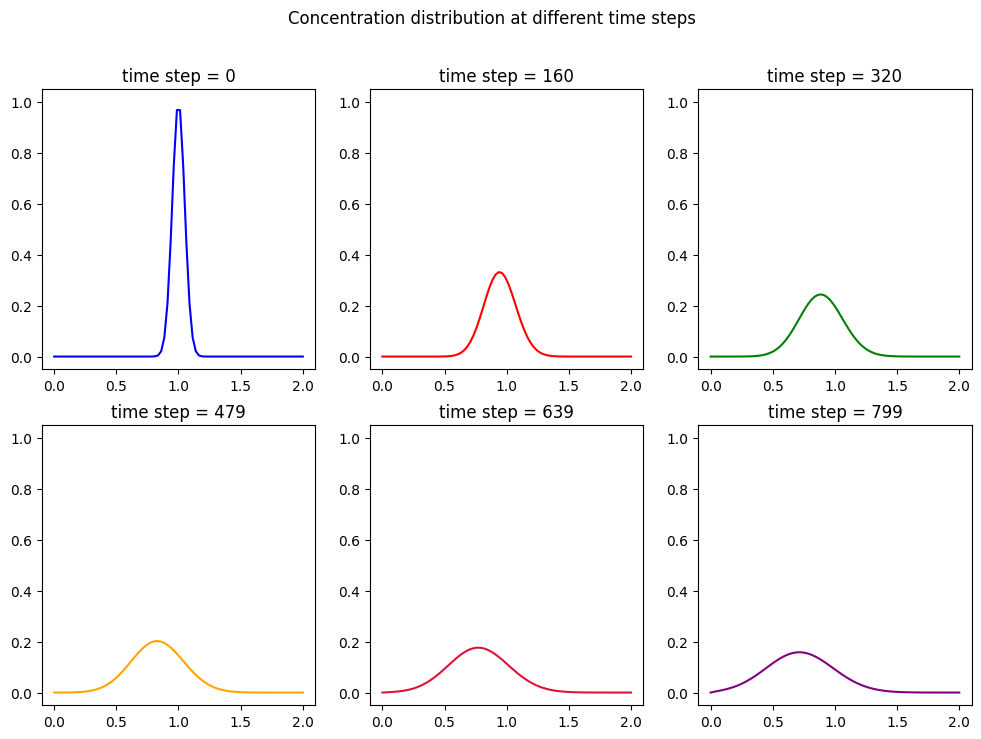

In [10]:
### Plotting results for different time steps tp show the progress

fig_subs = np.round(np.linspace(0, time_step-1, 6)).astype(int)

fig2, ax2 = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
fig2.suptitle('Concentration distribution at different time steps')
ax2[0,0].plot(x,c[fig_subs[0]], color='blue')
ax2[0,0].set_title(f'time step = {fig_subs[0]}')
ax2[0,0].set_ylim(-0.05, 1.05)
ax2[0,1].plot(x,c[fig_subs[1]], color='red')
ax2[0,1].set_title(f'time step = {fig_subs[1]}')
ax2[0,1].set_ylim(-0.05, 1.05)
ax2[0,2].plot(x,c[fig_subs[2]], color='green')
ax2[0,2].set_title(f'time step = {fig_subs[2]}')
ax2[0,2].set_ylim(-0.05, 1.05)
ax2[1,0].plot(x,c[fig_subs[3]], color='orange')
ax2[1,0].set_title(f'time step = {fig_subs[3]}')
ax2[1,0].set_ylim(-0.05, 1.05)
ax2[1,1].plot(x,c[fig_subs[4]], color='crimson')
ax2[1,1].set_title(f'time step = {fig_subs[4]}')
ax2[1,1].set_ylim(-0.05, 1.05)
ax2[1,2].plot(x,c[fig_subs[5]], color='purple')
ax2[1,2].set_title(f'time step = {fig_subs[5]}')
ax2[1,2].set_ylim(-0.05, 1.05);

plt.show()

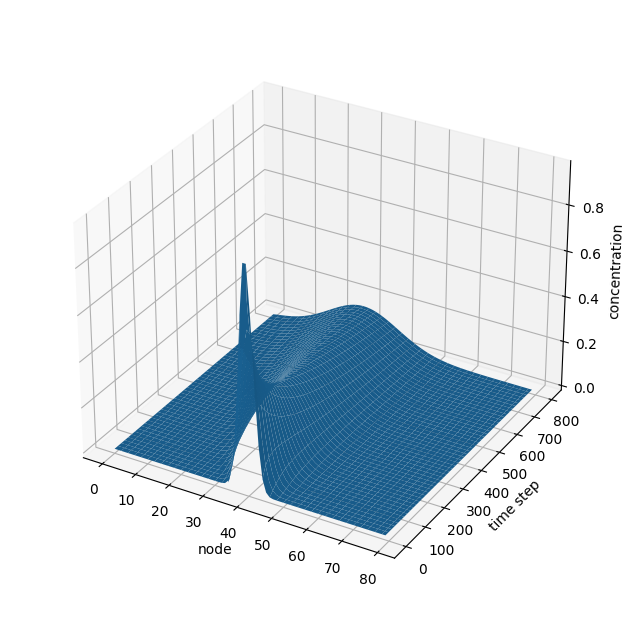

In [11]:
### 3D plot of the results

def plottable_3d(df: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df.index
    columns = df.columns
    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df[c][i] for c in columns] for i in index])
    
    return x, y, z


x, y, z = plottable_3d(df)

fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(projection='3d')
axes.plot_surface(x, y, z)

axes.set_xlabel('node')
axes.set_ylabel('time step')
axes.set_zlabel('concentration')
axes.set_box_aspect(aspect=None, zoom=0.9)

plt.show()